In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline

In [21]:
adult = pd.read_csv('dati/adult.csv')

In [22]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
def conversion_cat_to_numeric(col, data):
    for name in col:
        column = pd.Categorical.from_array(data[name])
        data[name] = column.codes

In [24]:
conversion_cat_to_numeric(["education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "workclass", 'income'], adult)

In [25]:
X_train = adult.drop('income', axis = 1)

In [26]:
y_train = adult['income']

In [27]:
extc = ExtraTreesClassifier()

In [28]:
extc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
fpr, tpr, thresholds = roc_curve(y_train, extc.predict_proba(X_train)[:,1])

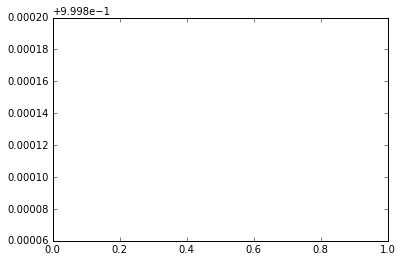

In [39]:
# <help:scikit_roc>
# plot the ROC curve, best for it to be in top left corner
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], 'k--') # add a straight line representing a random model 
for i, label in enumerate(labels):
    # false positive and true positive rate for each class
    fpr, tpr, _ = metrics.roc_curve(y_train, extc.predict_proba(X_train)[:,1])
    # area under the curve (auc) for each class
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve of {0} (area = {1:0.2f})'.format(label, roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic for Iris data set')
plt.xlabel('False Positive Rate') # 1- specificity
plt.ylabel('True Positive Rate') # sensitivity
plt.legend(loc="lower right")
plt.show()

In [40]:
roc_auc_score(y_train, extc.predict_proba(X_train)[:,1])

0.99993623262338982